<a href="https://colab.research.google.com/github/Raulac21/Challenge2TelecomX/blob/main/Challenge_2_Telecom_X_An%C3%A1lisis_de_Evasi%C3%B3n_de_Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Extracción

In [2]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()
df = pd.json_normalize(data)
df.head(10)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


 # 🔧 Transformación

In [3]:
#Se obtiene el tipo de datos de la base para despues transformarlo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [4]:
## Tipo de datos de cada columna
df.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


Simplificar mas las columnas para una mejor comprension

In [5]:
# Prefijos que existen en columnas
prefijos = ['customer.', 'phone.', 'internet.', 'account.', 'Charges.']

columnas_viejas = []
columnas_nuevas = []

for col in df.columns:
    es_prefijo = False

    # Verificar si la columna comienza con alguno de los prefijos
    for prefijo in prefijos:
        if col.startswith(prefijo):
            columnas_viejas.append(col)
            columnas_nuevas.append(col.replace(prefijo, '', 1))
            es_prefijo = True
            break

    if not es_prefijo:
        columnas_viejas.append(col)
        columnas_nuevas.append(col)

nuevos_nombres = dict(zip(columnas_viejas, columnas_nuevas))
df = df.rename(columns=nuevos_nombres)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [6]:
# Columnas relevantes para el caso
columnas_relevantes = ['Churn','gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
                    'MonthlyCharges', 'TotalCharges']

### Incoherencias en los Datos

In [7]:
print(df.isnull().sum()) ## valores nulos
print(df.duplicated().sum()) # valores duplicados

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64
0


In [8]:
import warnings # Para ignorar advertencias
warnings.filterwarnings('ignore')
print(f"Tipo de dato actual de 'Charges.Total': {df['Charges.Total'].dtype}")

# Quitar espacios en blanco y despues convertir a float
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
vacios_charges_total = df['Charges.Total'].isnull().sum()

if vacios_charges_total > 0:
    media_charges_total = df['Charges.Total'].mean()
    df['Charges.Total'].fillna(media_charges_total, inplace=True)

print(f"Nuevo tipo de dato de 'Charges.Total': {df['Charges.Total'].dtype}")


Tipo de dato actual de 'Charges.Total': object
Nuevo tipo de dato de 'Charges.Total': float64


In [9]:
# identificar  valores unicos que pertenecen a cada columna
for col in ['Churn','gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']:
    print(f'{col}: {df[col].unique()}')

Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [10]:
# Reemplazar los valores vacíos en 'Churn' con NaN y luego eliminarlos
conteo_churn_vacios = (df['Churn'] == '').sum()
if conteo_churn_vacios > 0:
    print(f"{conteo_churn_vacios} valores vacíos en la columna 'Churn'.")
    df['Churn'] = df['Churn'].replace('', np.nan)
    filas_sin_borrar = df.shape[0]
    df.dropna(subset=['Churn'], inplace=True)
    filas_borradas = df.shape[0]
else:
    print("No se encontraron valores vacíos en la columna 'Churn'.")

# Verificar de nuevo los valores únicos en 'Churn'
print("Valores únicos en la columna 'Churn' después del ajuste:")
print(df['Churn'].value_counts())
print(f"Número de valores únicos en 'Churn': {df['Churn'].nunique()}")

224 valores vacíos en la columna 'Churn'.
Valores únicos en la columna 'Churn' después del ajuste:
Churn
No     5174
Yes    1869
Name: count, dtype: int64
Número de valores únicos en 'Churn': 2


### Crear Nueva Columna "Cuentas Diaria"

In [11]:
## Para el calculo utilizaremos 31 Dias que en promedio ya que son mas los meses en 31 dias
df['Cuentas_Diarias'] = (df['Charges.Monthly'] / 31).round(2)
df[['Charges.Monthly', 'Cuentas_Diarias']].sample(5)

,Charges.Monthly,Cuentas_Diarias
1018,19.70,0.64
4748,19.55,0.63
6677,24.10,0.78
1243,89.85,2.90
4843,99.45,3.21


### Estandarizado

In [12]:
from pandas.core.frame import DataFrame
import warnings
warnings.filterwarnings('ignore')

# Definir el mapeo para 'Yes' y 'No' a 1 y 0
map_si_no = {'Yes': 1, 'No': 0}

# Columnas que contienen 'Yes'/'No' y deben ser binarias
cols_bin = [
    'Churn',
    'Partner',
    'Dependents',
    'PaperlessBilling'
]

for col in cols_bin:
    if col in df.columns:
        df[col] = df[col].map(map_si_no)
        if df[col].isnull().sum() == 0:
            df[col] = df[col].astype(int)

# Para estas columnas, 'Yes' será 1, y 'No' o 'No internet service' será 0.
cols_internet_servicio = [
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

for col in cols_internet_servicio:
    if col in df.columns:
        df[col] = df[col].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
        df[col] = pd.to_numeric(df[col], errors='coerce').astype(int)

# Verificando
print('\nTipos de datos después de la transformación:')
print(df[cols_bin + cols_internet_servicio].dtypes)

display(df[cols_bin + cols_internet_servicio].sample(5))


Tipos de datos después de la transformación:
Churn               int64
Partner             int64
Dependents          int64
PaperlessBilling    int64
OnlineSecurity      int64
OnlineBackup        int64
DeviceProtection    int64
TechSupport         int64
StreamingTV         int64
StreamingMovies     int64
dtype: object


,Churn,Partner,Dependents,PaperlessBilling,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
5876,1,1,0,1,1,1,1,0,0,0
4630,0,0,0,1,0,0,0,0,0,0
6376,0,0,0,0,0,1,0,1,0,1
337,0,1,0,0,1,0,1,1,1,0
1514,1,0,0,1,0,0,1,0,1,1


### Cambio de Idioma

In [13]:
# Cambio de Idioma para mejor comprension
col_idioma = {
    'Churn': 'Abandono',
    'gender': 'Genero',
    'SeniorCitizen': 'Tercera_Edad',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'Antiguedad_Meses',
    'InternetService': 'Servicio_Internet',
    'OnlineSecurity': 'Seguridad_Online',
    'OnlineBackup': 'Respaldo_Online',
    'DeviceProtection': 'Proteccion_Dispositivo',
    'TechSupport': 'Soporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Peliculas',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Facturacion_Online',
    'PaymentMethod': 'Metodo_Pago',
    'Charges.Monthly': 'Cargos_Mensuales',
    'Charges.Total': 'Cargos_Totales',
    'Cuentas_Diarias': 'Cargos_Diarios'
}

df.rename(columns=col_idioma, inplace=True)

print("Nombres de columnas traducidos:")
print(df.columns)
display(df.head())

Nombres de columnas traducidos:
Index(['customerID', 'Abandono', 'Genero', 'Tercera_Edad', 'Pareja',
       'Dependientes', 'Antiguedad_Meses', 'PhoneService', 'MultipleLines',
       'Servicio_Internet', 'Seguridad_Online', 'Respaldo_Online',
       'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV',
       'Streaming_Peliculas', 'Tipo_Contrato', 'Facturacion_Online',
       'Metodo_Pago', 'Cargos_Mensuales', 'Cargos_Totales', 'Cargos_Diarios'],
      dtype='object')


,customerID,Abandono,Genero,Tercera_Edad,Pareja,Dependientes,Antiguedad_Meses,PhoneService,MultipleLines,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Facturacion_Online,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cargos_Diarios
0,0002-ORFBO,0,Female,0,1,1,9,Yes,No,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.12
1,0003-MKNFE,0,Male,0,0,0,9,Yes,Yes,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.93
2,0004-TLHLJ,1,Male,0,0,0,4,Yes,No,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.38
3,0011-IGKFF,1,Male,1,1,0,13,Yes,No,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.16
4,0013-EXCHZ,1,Female,1,1,0,3,Yes,No,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.71


# 📊 Carga y análisis

In [14]:
df.describe()

,Abandono,Tercera_Edad,Pareja,Dependientes,Antiguedad_Meses,Seguridad_Online,Respaldo_Online,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Facturacion_Online,Cargos_Mensuales,Cargos_Totales,Cargos_Diarios
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2283.296277,2.089125
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2265.000260,0.970674
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.590000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,402.225000,1.150000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1400.550000,2.270000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,2.900000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.830000


### **Interpretacion de datos**

***1.*** Abandono de clientes (**Churn**)

*   Promedio: 26% de los clientes dejan el servicio.
*   Qué significa: Aproximadamente 1 de cada 4 clientes cancela su suscripción.
*   Implicación práctica: Una tasa del 26% es alta, lo que sugiere problemas en precio, servicio o competencia.


***2.*** Clientes de tercera edad (**Senior Citizen**)

- Proporción: 16% de los clientes tienen 65 años o más.

Qué significa: De cada 100 clientes: 16 son adultos mayores, 84 son menores de 65 años

***3.*** Antigüedad del cliente (**Tenure**)

* Media: 32 meses (≈ 2 años y 8 meses)

* Mediana: 29 meses (≈ 2 años y 5 meses)

* Desviación estándar: 25 meses (≈ 2 años y 1 mes)

Qué significa:

Existe mucha diversidad en el tiempo que llevan los clientes (desde muy nuevos hasta muy antiguos).

Media y mediana parecidas sugieren distribución relativamente equilibrada, sin demasiados extremos.

***4.*** Cargos mensuales (***Monthly Charges***)

* Media: $70

* Mediana: (superior a la media)

Desviación estándar: $30

Qué significa:

El gasto mensual es moderado en promedio.

Como la mediana > media, hay más clientes pagando planes caros que baratos.

La variabilidad indica diferentes tipos de planes (básicos, medios y premium).

***5.*** Cargos totales acumulados (***Total Charges***)

* Media: $1,410.25

* Desviación estándar: $2,265.04

Qué significa:

La gran diferencia entre media y desviación revela altísima dispersión.

Indica que existen clientes con muy poco tiempo de uso y otros con muchos años, generando gastos acumulados muy altos.

Esto sugiere la presencia de clientes de alto valor (antiguos + planes costosos).

***6.*** Cargos diarios (***Cuentas Diarias***)

* Media: $2.27

* Desviación estándar: $0.97

Qué significa:

Es básicamente una conversión del costo mensual a diario.

Mantiene la misma lógica de variabilidad entre planes.

***Conclusiones generales***

Existen múltiples segmentos de clientes diferenciados por antigüedad y gasto.

* La tasa de abandono (26%) es alta y requiere un plan de retención.

* Es probable que los clientes nuevos abandonen más, ya que la antigüedad media es baja (32 meses).

* Los clientes antiguos y de alto gasto son una oportunidad clave para programas de fidelización.

* La dispersión en cargos indica heterogeneidad en el portafolio de planes.

###Distribución de evasión (Churn)

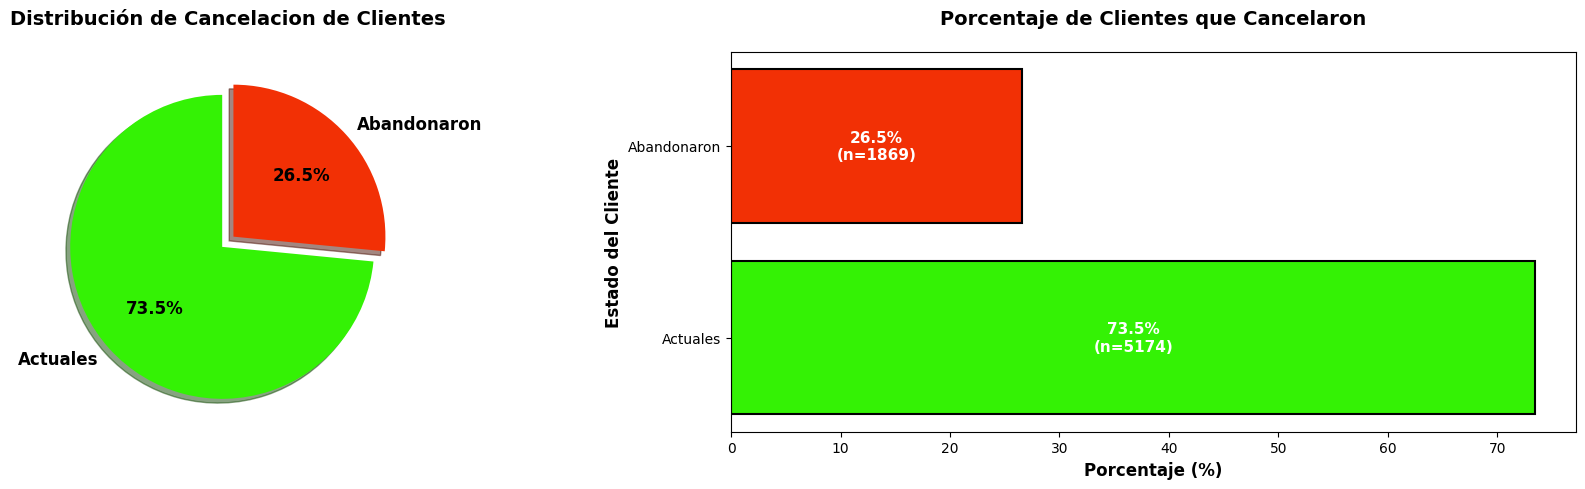


De un total de 7,043 clientes, 5,174 se mantuvieron activos, lo que representa una tasa de retención del (73.46%).
Por otro lado, 1,869 clientes cancelaron el servicio, equivalente a una tasa de cancelación (churn) del 26.54%).
Estos resultados indican que aproximadamente 1 de cada 4 clientes abandona el servicio, lo que refleja un nivel de cancelación relevante que debe ser considerado para estrategias de fidelización y mejora del servicio.


In [15]:
# 1. Gráfico de pastel
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Conteo de valores de Abandono
conteo_cancel = df['Abandono'].value_counts()
etiquetas = ['Actuales', 'Abandonaron']
colores = ['#34f205', '#f23005']

# Gráfico 1
axes[0].pie(conteo_cancel, labels=etiquetas, autopct='%1.1f%%',
            startangle=90, colors=colores, explode=(0.05, 0.05),
            shadow=True, textprops={'fontsize': 12, 'weight': 'bold'})
axes[0].set_title('Distribución de Cancelacion de Clientes',
                   fontsize=14, weight='bold', pad=20)
# Gráfico 2
porcentajes = (conteo_cancel / conteo_cancel.sum() * 100).values
axes[1].barh(etiquetas, porcentajes, color=colores, edgecolor='black', linewidth=1.5)
axes[1].set_title('Porcentaje de Clientes que Cancelaron',
                   fontsize=14, weight='bold', pad=20)
axes[1].set_xlabel('Porcentaje (%)', fontsize=12, weight='bold')
axes[1].set_ylabel('Estado del Cliente', fontsize=12, weight='bold')

# Agregar valores
for i, (porc, count) in enumerate(zip(porcentajes, conteo_cancel.values)):
    axes[1].text(porc/2, i, f'{porc:.1f}%\n(n={count})',
                 ha='center', va='center', fontsize=11, weight='bold', color='white')

plt.tight_layout()
plt.show()

print('\n'f"""De un total de {len(df):,} clientes, {conteo_cancel[0]:,} se mantuvieron activos, lo que representa una tasa de retención del ({porcentajes[0]:.2f}%).
Por otro lado, {conteo_cancel[1]:,} clientes cancelaron el servicio, equivalente a una tasa de cancelación (churn) del {porcentajes[1]:.2f}%).
Estos resultados indican que aproximadamente 1 de cada 4 clientes abandona el servicio, lo que refleja un nivel de cancelación relevante que debe ser considerado para estrategias de fidelización y mejora del servicio.""")


###Conteo de evasión por variables numéricas

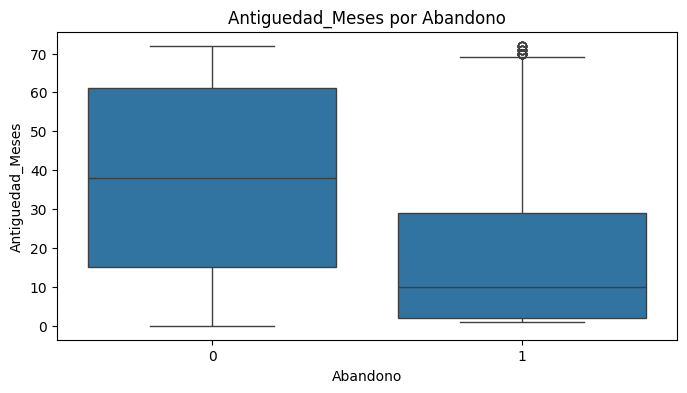

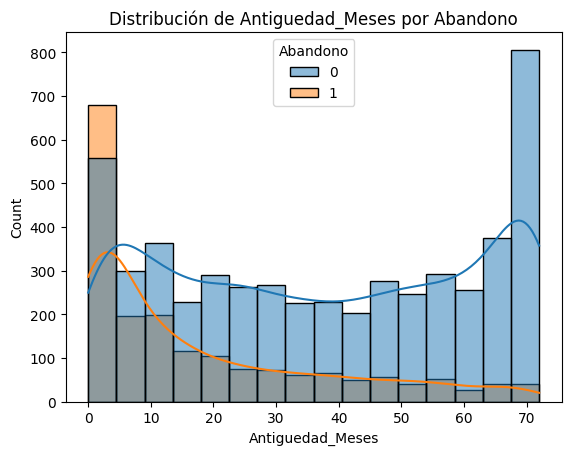

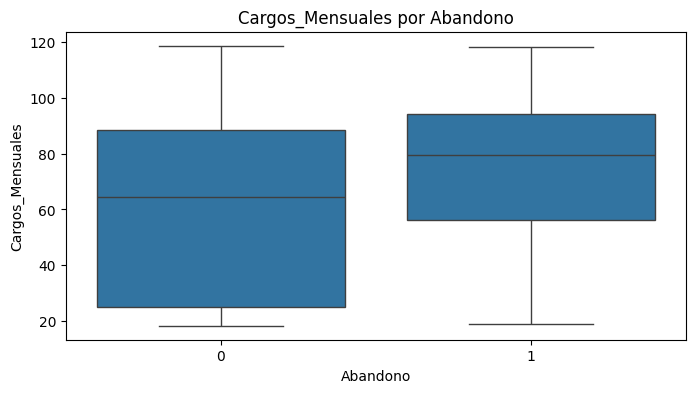

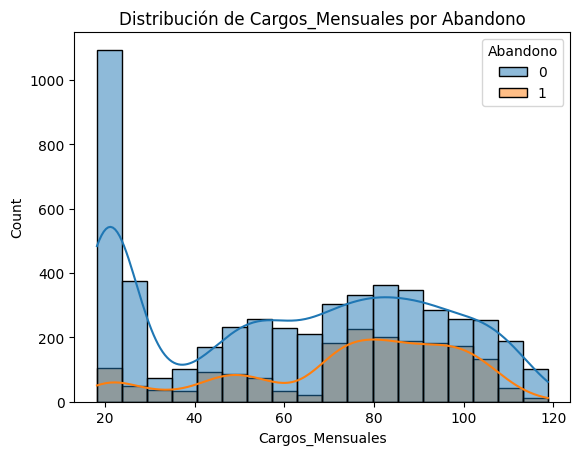

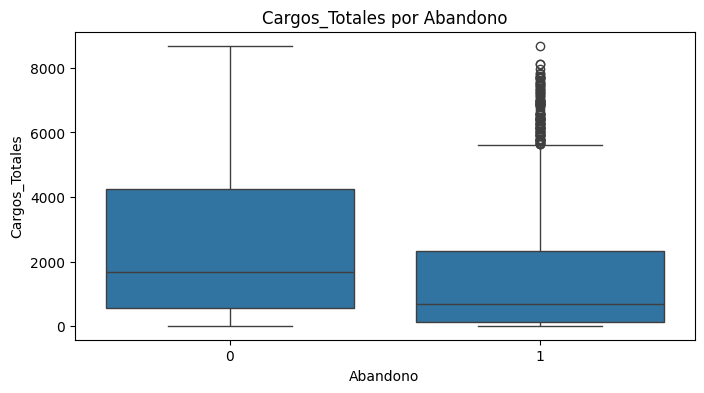

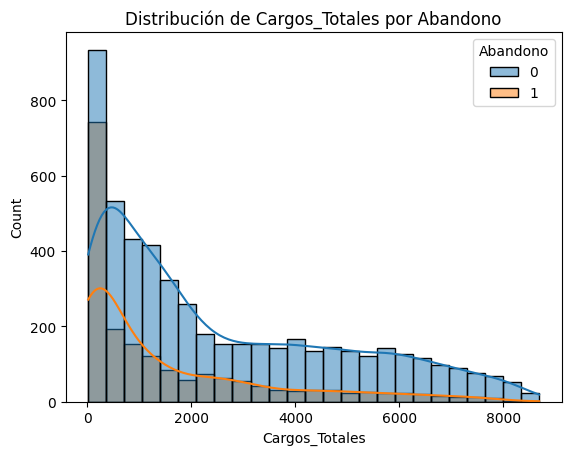

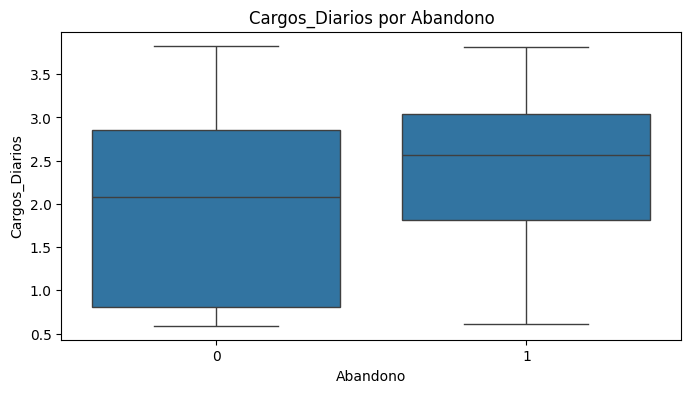

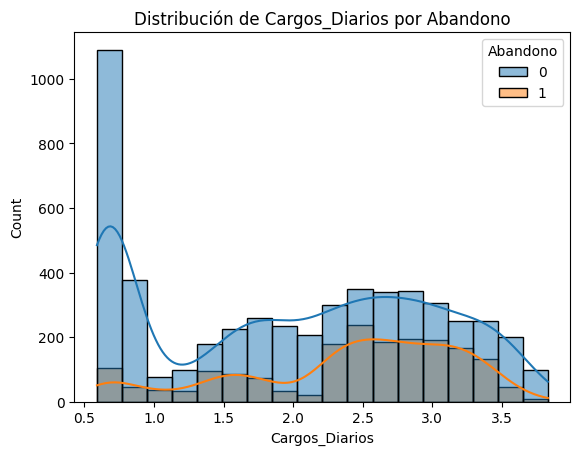

In [16]:
num_vars = ['Antiguedad_Meses', 'Cargos_Mensuales', 'Cargos_Totales', 'Cargos_Diarios']

for var in num_vars:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Abandono', y=var, data=df)
    plt.title(f'{var} por Abandono')
    plt.show()

    # Histograma
    sns.histplot(data=df, x=var, hue='Abandono', kde=True)
    plt.title(f'Distribución de {var} por Abandono')
    plt.show()

###**Resumen del análisis de variables numéricas por abandono**

El análisis muestra diferencias claras entre los clientes que permanecen y los que abandonan el servicio.

Los clientes que abandonan tienen, en promedio, menor antigüedad (18 meses) que los que permanecen (38 meses), lo que representa una diferencia cercana al 52%, indicando que el abandono ocurre principalmente en etapas tempranas de la relación con la empresa.

En cuanto a los cargos, los clientes que abandonan presentan cargos mensuales y diarios más altos. En promedio, pagan 21.6% más al mes y 21.6% más por día que los clientes que permanecen, lo que sugiere que precios más elevados están asociados a una mayor probabilidad de cancelación.

Por el contrario, los cargos totales acumulados son menores en los clientes que abandonan (−39.8%), lo cual es coherente con su menor tiempo de permanencia.

Conclusión: el abandono se concentra en clientes con poca antigüedad y costos más altos, lo que indica que los primeros meses y la percepción del precio son factores clave en la decisión de cancelación.

###**Recuento de evasión por variables categóricas**

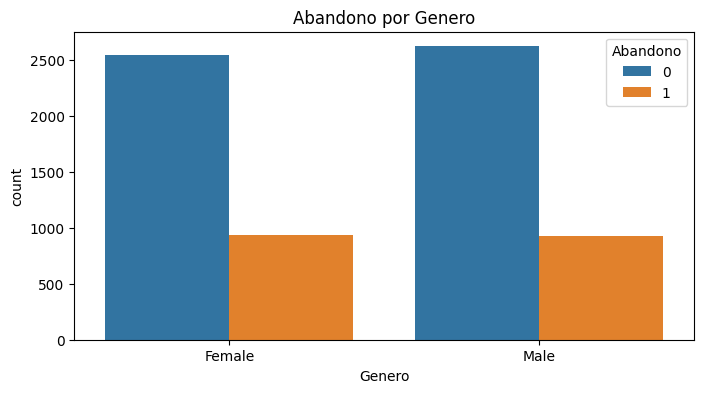

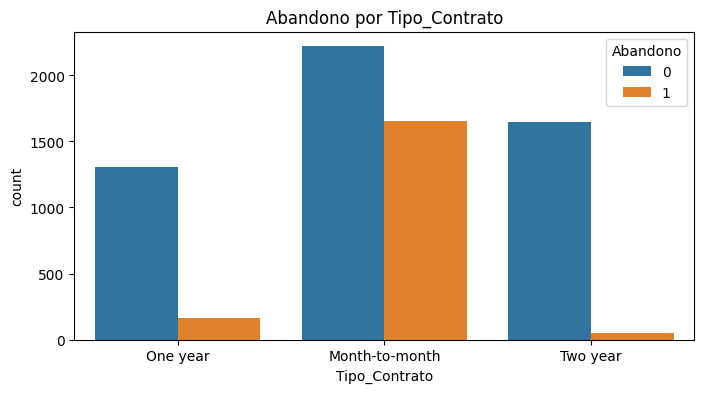

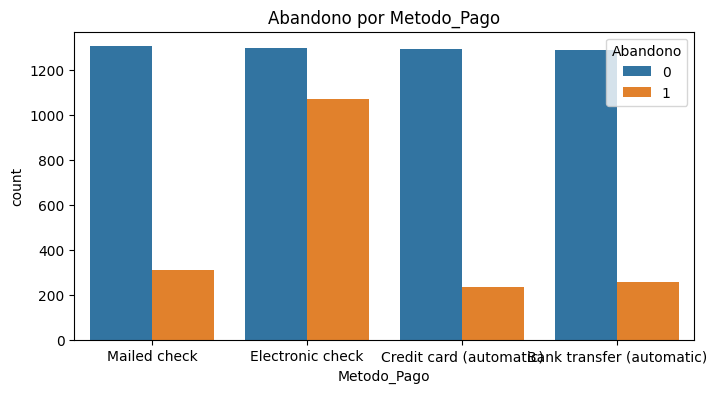

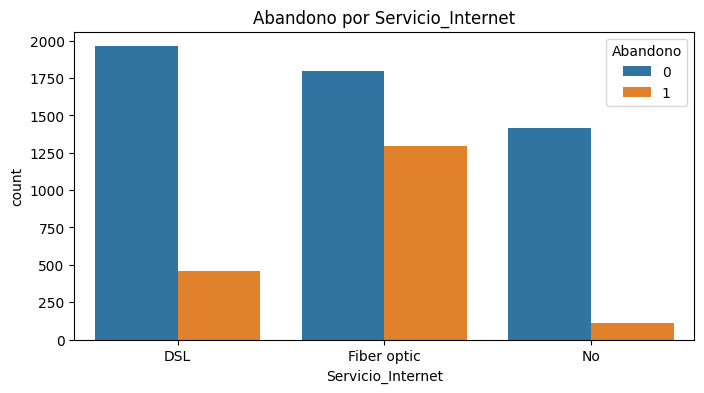

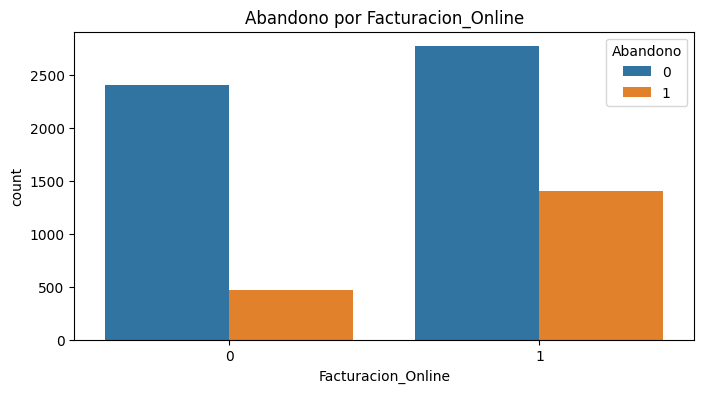

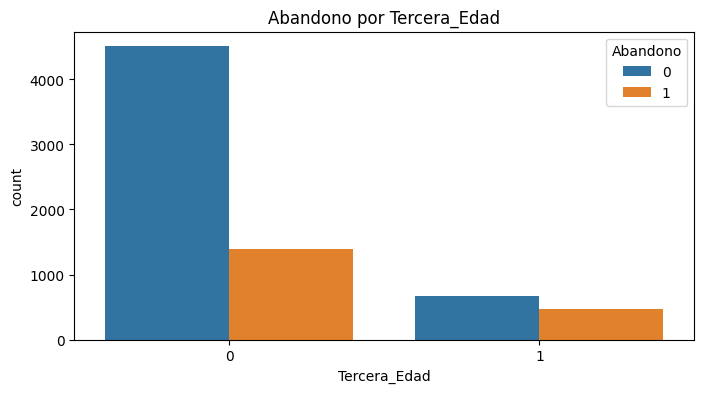

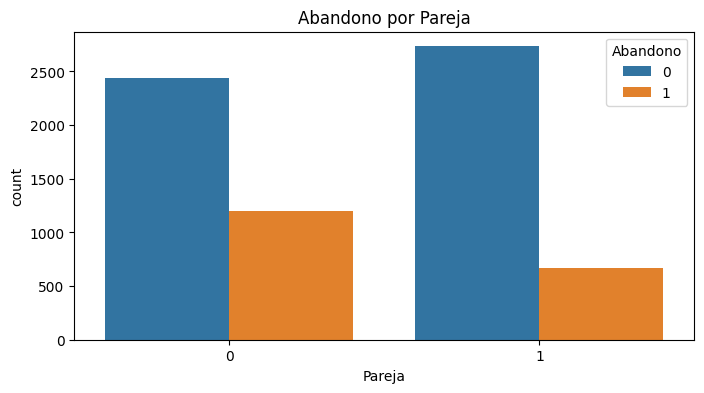

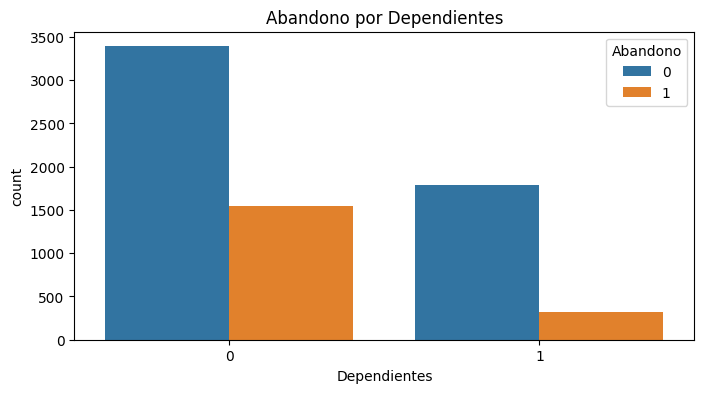

In [17]:
cat_variables = ['Genero', 'Tipo_Contrato', 'Metodo_Pago', 'Servicio_Internet',
                         'Facturacion_Online', 'Tercera_Edad', 'Pareja', 'Dependientes']

for var in cat_variables:
    plt.figure(figsize=(8,4))
    sns.countplot(x=var, hue='Abandono', data=df)
    plt.title(f'Abandono por {var}')
    plt.show()

El abandono no presenta diferencias relevantes por género, ya que mujeres (26.8%) y hombres (26.1%) muestran tasas muy similares. En contraste, el tipo de contrato es el factor más determinante: los contratos mes a mes concentran el mayor abandono (42.6%), mientras que los contratos de uno (11.3%) y dos años (2.8%) presentan alta retención.

El método de pago también influye significativamente: el electronic check registra la mayor tasa de abandono (45.2%), frente a métodos automáticos como transferencia bancaria y tarjeta de crédito (≈15–17%). Respecto al servicio de internet, los clientes con fibra óptica muestran un abandono elevado (41.8%), comparado con DSL (18.9%) y quienes no tienen internet (7.2%).

Adicionalmente, la facturación en línea se asocia con mayor abandono (33.4% vs 16.3%). Los clientes de tercera edad presentan una tasa considerablemente más alta (41.6%) que los no seniors (23.5%). Finalmente, tener pareja y dependientes se relaciona con menor abandono, indicando mayor estabilidad en estos segmentos.

# 📄Informe final

**Telecom X** presenta una ***tasa de abandono del 26.54%***, lo que representa un riesgo importante para su rentabilidad. El análisis se realizó sobre 7,043 clientes, con el objetivo de identificar los factores que explican la cancelación del servicio y generar información útil para mejorar la retención.

Los ***datos fueron depurados y estandarizados***, eliminando duplicados y registros incompletos, y ajustando valores faltantes. Además, se transformaron variables para facilitar el análisis y mejorar la claridad de la información.

Los resultados muestran que el abandono está fuertemente asociado al tipo de contrato: los clientes con planes mes a mes son los más propensos a cancelar (≈43%), mientras que los contratos de largo plazo presentan una alta retención. También influyen de manera relevante el método de pago, destacando el cheque electrónico como el de mayor riesgo, y el tipo de servicio de internet, donde la fibra óptica concentra una tasa de abandono elevada.

Desde el punto de vista demográfico, los adultos mayores, los clientes sin pareja y sin dependientes muestran mayor probabilidad de abandono. En contraste, el género no representa una diferencia significativa.

En cuanto a variables numéricas, **los clientes que cancelan suelen tener menor antigüedad**, pagan cargos mensuales más altos y acumulan menor gasto total, lo que indica una relación entre planes más costosos, menor tiempo de permanencia y mayor riesgo de cancelación.

En conclusión, el abandono en Telecom X está principalmente ligado a contratos flexibles, métodos de pago no automáticos, servicios de mayor costo y perfiles con menor estabilidad, lo que abre oportunidades claras para diseñar estrategias de retención enfocadas en estos segmentos críticos.

***INSIGHTS***

El análisis confirma que el tipo de contrato es el principal factor de abandono: los contratos mensuales presentan casi cuatro veces más riesgo que los anuales. El método de pago también es determinante, ya que el cheque electrónico genera un abandono significativamente mayor frente al débito automático. Además, la antigüedad del cliente actúa como un factor protector: los clientes con menos de 18 meses son los más propensos a cancelar.

Se identificó que la ausencia de servicios adicionales incrementa el abandono y que el servicio de fibra óptica, pese a ser premium, presenta la tasa más alta de cancelación, lo que sugiere un desajuste entre precio y valor percibido.

Los segmentos de mayor riesgo incluyen clientes nuevos con contrato mensual, adultos mayores sin pareja ni dependientes, usuarios de fibra óptica con facturación en línea y clientes que pagan mediante cheque electrónico.

Como acciones recomendadas, se propone incentivar contratos de largo plazo, fomentar el uso de pagos automáticos, implementar un programa de retención temprana para clientes nuevos, revisar la estrategia del servicio de fibra óptica y aplicar una segmentación demográfica más específica, con ofertas y beneficios adaptados a cada perfil de cliente.